<a href="https://colab.research.google.com/github/zuhaibai123/Logistic-regression/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/titanic_dataset (1).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


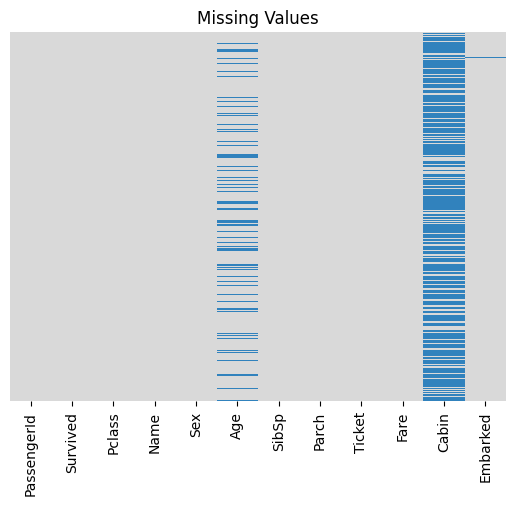

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="tab20c_r",cbar=False)
plt.title("Missing Values")
plt.show()

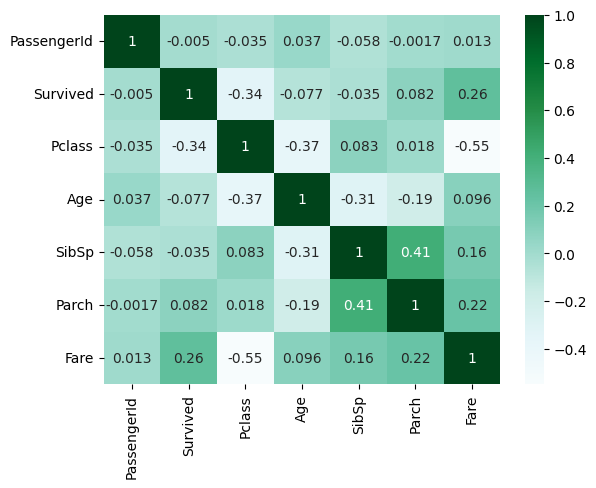

In [ ]:
df_num=df.select_dtypes(include=("number"))
sns.heatmap(df_num.corr(),cmap="BuGn",annot=True)
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

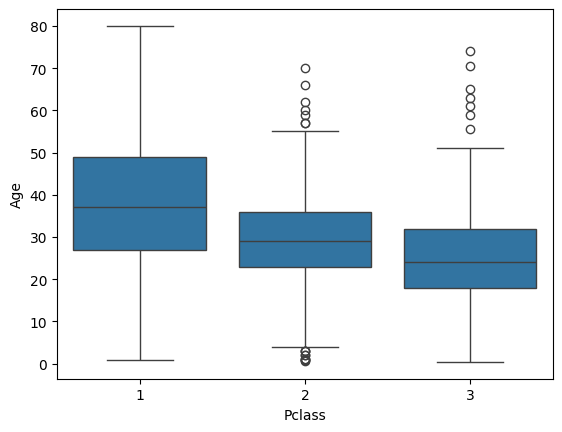

In [ ]:
sns.boxplot(x=df["Pclass"],y=df["Age"])

In [ ]:
def impute_age(x):
 Age=x[0]
 Pclass=x[1]

 if pd.isnull(Age):
  if Pclass==1:
    return 37
  elif Pclass==2:
    return 28

  else:
    return 24

 else:
  return Age


df["Age"]=df[["Age","Pclass"]].apply(impute_age,axis=1)

<ipython-input-40-268f39a1aa17>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=x[0]
<ipython-input-40-268f39a1aa17>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=x[1]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


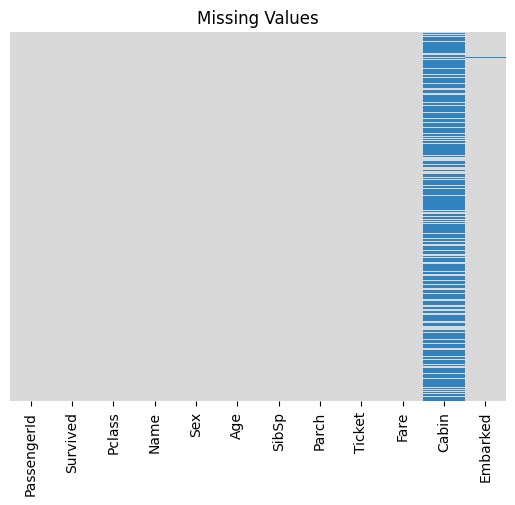

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="tab20c_r",cbar=False)
plt.title("Missing Values")
plt.show()

In [ ]:
df.drop(["PassengerId","Name","Ticket","Cabin"],inplace=True,axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
cat=["Sex","Embarked"]
for i in cat:
  df[i]=df[i].astype("category")

In [ ]:
sex=pd.get_dummies(df["Sex"],drop_first=True)
embarked=pd.get_dummies(df["Embarked"],drop_first=True)
print(sex)
print(embarked)

      male
0     True
1    False
2    False
3    False
4     True
..     ...
886   True
887  False
888  False
889   True
890   True

[891 rows x 1 columns]
         Q      S
0    False   True
1    False  False
2    False   True
3    False   True
4    False   True
..     ...    ...
886  False   True
887  False   True
888  False   True
889  False  False
890   True  False

[891 rows x 2 columns]


In [ ]:
df=pd.concat([df,sex,embarked],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
 8   male      891 non-null    bool    
 9   Q         891 non-null    bool    
 10  S         891 non-null    bool    
dtypes: bool(3), category(2), float64(2), int64(4)
memory usage: 46.5 KB


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   male      891 non-null    bool   
 9   Q         891 non-null    bool   
 10  S         891 non-null    bool   
dtypes: bool(3), float64(2), int64(4), object(2)
memory usage: 58.4+ KB


In [ ]:
df.drop(["Embarked"],inplace=True,axis=1)

In [ ]:
df.drop(["Sex"],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    bool   
 7   Q         891 non-null    bool   
 8   S         891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,24.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [ ]:
x=df.drop(["Survived"],axis=1)
y=df["Survived"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=106)


# Logistic Regreesion

In [ ]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()

lreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=lreg.predict(x_test)
print(y_pred)

[0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0]


MODEL EVALUATION

ACCURACY =  81.56 %
PRECISION =  81.97 %
RECALL =  69.44 %
f1_score =  75.19
----------------------------------------------------------------------------------------------------
[[96 11]
 [22 50]]


<Axes: >

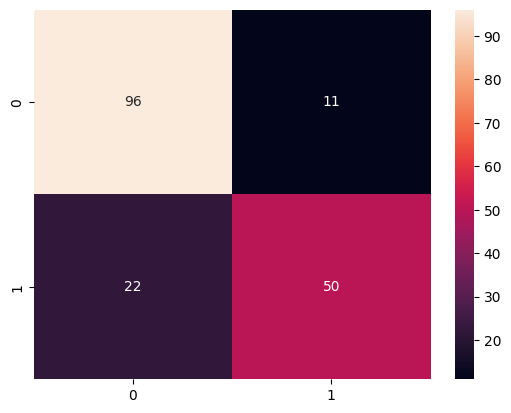

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
accuracy=round(accuracy_score(y_test,y_pred)*100,2)
recall=round(recall_score(y_test,y_pred)*100,2)
precision=round(precision_score(y_test,y_pred)*100,2)
confusion=confusion_matrix(y_test,y_pred)
f1=round(f1_score(y_test,y_pred)*100,2)

print("ACCURACY = ",accuracy,"%")
print("PRECISION = ",precision,"%")
print("RECALL = ",recall,"%")
print("f1_score = ",f1)
print("--"*50)
print(confusion)

sns.heatmap(confusion,annot=True)

# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_c=DecisionTreeClassifier()
d_c.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=d_c.predict(x_test)


MODEL EVALUATION

Precision = 73.02
Accuracy = 75.98%
Recall = 63.89%
f1 = 68.15
----------------------------------------------------------------------------------------------------
[[90 17]
 [26 46]]


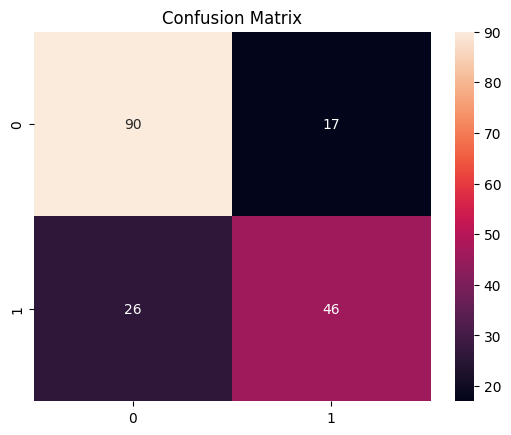

In [ ]:
accuray=round(accuracy_score(y_test,y_pred)*100,2)
recall=round(recall_score(y_test,y_pred)*100,2)
precision=round(precision_score(y_test,y_pred)*100,2)
f1=round(f1_score(y_test,y_pred)*100,2)
confusion=confusion_matrix(y_test,y_pred)

print(f"Precision = {precision}")
print(f"Accuracy = {accuray}%")
print(f"Recall = {recall}%")
print(f"f1 = {f1}")
print("--"*50)

print(confusion)

sns.heatmap(confusion,annot=True)
plt.title("Confusion Matrix")
plt.show()